In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [2]:
colors = ['red', 'orange', 'green', 'blue']
log10ztr_table = [3,3.5,4.5,5]
log10dr_table = [7, 7.6,8.0 ,8.3]
f_SIDM_table = [0.01, 0.03, 0.05, 0.1]
log10Gamma_table = [-5, -3, 1, 3]
omega_dcdm_table = np.linspace(0.01, 0.5, 10)
omega_dm_best = 0.12
#'100*theta_s':1.0399625783900215

In [3]:
common_settings_DCDM = {'omega_b':0.0223828,'100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit', 'ignore CDR at BBN': 'yes'}

common_settings_LCDM = {'omega_b':0.0223828, '100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit'}

0.1221557558121345
k = 0.025051071377752695
3456.7934096461086
0.12541499763708033
k = 0.02515703585183417
3537.8287926271464
0.1336018423240785
k = 0.025421258449155475
3742.7453509749384
0.1415574609018037
k = 0.02567541360154946
3943.9196728892307


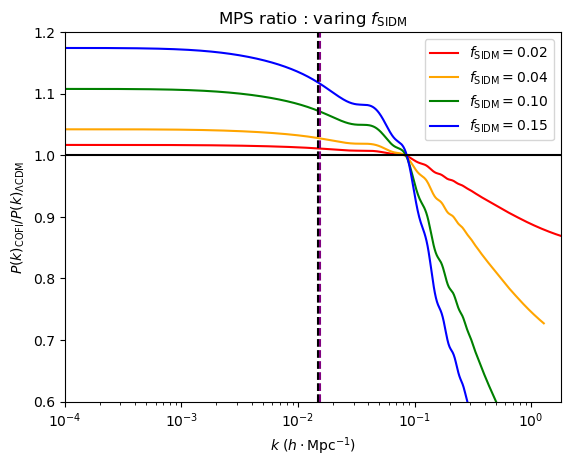

In [4]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)
log10dr_table = [6.5,6.9,7.3 ,7.5]

for i in range(4):
    f = log10dr_table[i]+1

    a_tr = 1/(1+1e4)
    
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 10**f,'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': 1e-1, 'a_tr':1/(1+1e4), 'omega_cdm': 0})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : COFI.omega_dcdm() + COFI.omega_dr()})
    LCDM.compute()

    h_COFI = COFI.h()
    h_LCDM = LCDM.h()

    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    zeq = COFI.z_eq()
    kk = kk*h_LCDM

    omegadr = COFI.omega_dr()
    omegadcdm = COFI.omega_dcdm()
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{:.2f}'.format(omegadr/(omegadcdm+omegadr)))
    print(omegadr + omegadcdm)
    print("k = {}".format(a_tr*COFI.Hubble(1e4)))
    print(zeq)
    
ax.set_xlim(1e-4, 3*h_LCDM)
ax.set_ylim(0.6, 1.2)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.vlines(0.025*h_LCDM, 0.6, 1.2, color = 'k', linestyles='dashed')
ax.vlines(a_tr*COFI.Hubble(1e4)*h_LCDM, 0.6, 1.2, color = 'purple', linestyles='dashed')
ax.set_title(r'MPS ratio : varing $f_{\mathrm{SIDM}}$')
ax.set_xlabel(r'$k$ ($h\cdot$Mpc$^{-1}$)')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k)_{\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_f.pdf")
        

0.12006823885878525
0.12021563122725991
0.12215560916408111
0.12681646182265296


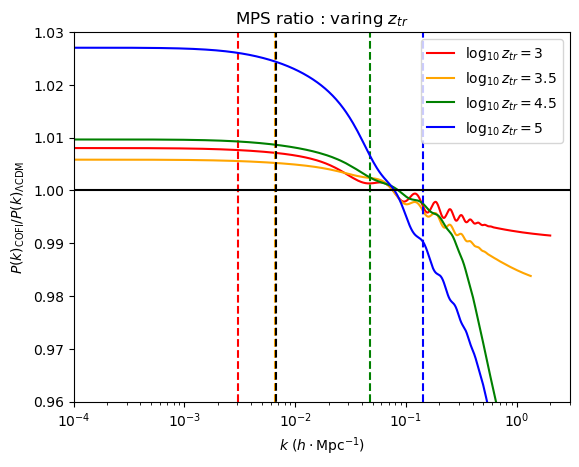

In [37]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)

for i in range(4):
    z = 10**log10ztr_table[i]

    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_cdm':0, 'omega_ini_dr': 1e7,'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': 1e-1, 'a_tr':1/(1+z)})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : COFI.omega_dcdm() + COFI.omega_dr()})
    LCDM.compute()
    omegadr = COFI.omega_dr()
    omegadcdm = COFI.omega_dcdm()
    h_COFI = COFI.h()
    h_LCDM = LCDM.h()
    kk = kk*h_LCDM
    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$\log_{10}z_{tr}=$'+'{}'.format(log10ztr_table[i]))
    ax.vlines(COFI.Hubble(z)/(1+z) * h_LCDM, 0.96, 1.03, color= colors[i], linestyles='dashed')
    print(omegadr + omegadcdm)
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0.96, 1.03)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.vlines(COFI.Hubble(3400)/(1+3400) * h_LCDM, 0.9, 1.1, color = 'k', linestyles='dashed')
ax.set_title(r'MPS ratio : varing $z_{tr}$')
ax.set_xlabel(r'$k$ ($h\cdot$Mpc$^{-1}$)')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k)_{\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_ztr.pdf")

TypeError: argument of type 'NoneType' is not iterable

Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 210, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


TypeError: argument of type 'NoneType' is not iterable

Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 210, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


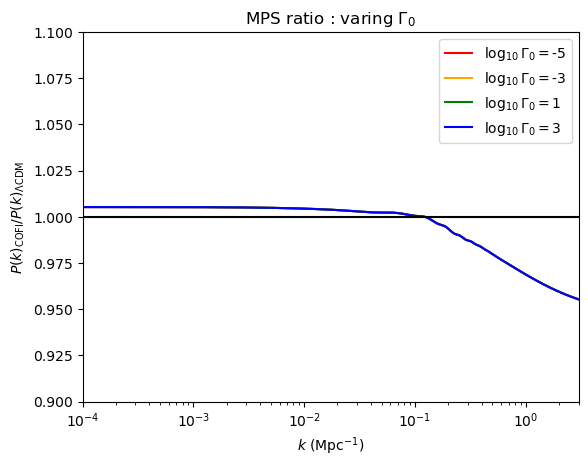

In [27]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)

for i in range(4):
    Gamma = 10**log10Gamma_table[i]

    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 1e7,'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': Gamma, 'a_tr':1/(1+1e4), 'omega_cdm': 0})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : COFI.omega_dcdm() + COFI.omega_dr()})
    LCDM.compute()

    h_COFI = COFI.h()
    h_LCDM = LCDM.h()
    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$\log_{10}\Gamma_0=$'+'{}'.format(log10Gamma_table[i]))
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0.9, 1.1)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.set_title(r'MPS ratio : varing $\Gamma_0$')
ax.set_xlabel(r'$k$ (Mpc$^{-1}$)')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k)_{\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_Gamma.pdf")

Text(0, 0.5, 'MPS')

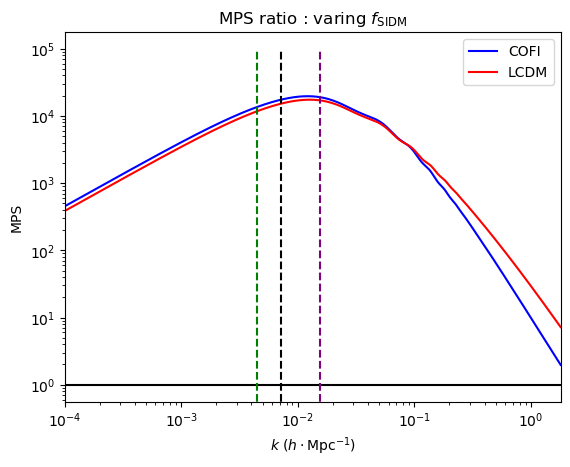

In [14]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)
log10dr_table = [6.5,6.9,7.3 ,7.5]

for i in range(1):
    f = log10dr_table[3]+1

    a_tr = 1/(1+1e4)
    
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 10**f,'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': 1e-1, 'a_tr':1/(1+1e4), 'omega_cdm': 0})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : COFI.omega_dcdm() + COFI.omega_dr()})
    LCDM.compute()

    h_COFI = COFI.h()
    h_LCDM = LCDM.h()

    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    zeq = COFI.z_eq()
    zeq_LCDM = LCDM.z_eq()
    kk = kk*h_LCDM

    omegadr = COFI.omega_dr()
    omegadcdm = COFI.omega_dcdm()
    
    ax.plot(kk, MPS_COFI, color = 'b', label = 'COFI')
    ax.plot(kk, MPS_LCDM, color = 'r', label = 'LCDM')
    
ax.set_xlim(1e-4, 3*h_LCDM)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.vlines(h_LCDM*LCDM.Hubble(zeq_LCDM)/(1+zeq_LCDM), 0, 1e5, color = 'k', linestyles='dashed')
ax.vlines(a_tr*COFI.Hubble(1e4)*h_LCDM, 0, 1e5, color = 'purple', linestyles='dashed')
ax.vlines(h_COFI*COFI.Hubble(zeq)*h_LCDM/(1+zeq), 0, 1e5, color = 'green', linestyles='dashed')
ax.set_title(r'MPS ratio : varing $f_{\mathrm{SIDM}}$')
ax.set_xlabel(r'$k$ ($h\cdot$Mpc$^{-1}$)')
ax.set_ylabel('MPS')

In [13]:
h_COFI*COFI.Hubble(zeq)*h_LCDM

17.52070489312937